In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as lm
import sys
sys.path.append('C:\\Users\\suhaibkiani\\desktop\\Final_project')
import exp
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt


#to perform the train test split of the data, the train test split function is imported from sklearn
from sklearn.model_selection import train_test_split
#the given problem is a classificaton problem. Hence linear regression is used for ML algorithm
from sklearn.linear_model import LinearRegression

In [2]:
file = "features_45k.csv"
tds1 = pd.read_csv(file)
tds1 = tds1[['Artist', 'Track', 'followers','instrumentalness','popularity','acousticness', 'danceability', 'duration_ms', 'energy', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]
tds1.head()

,Artist,Track,followers,instrumentalness,popularity,acousticness,danceability,duration_ms,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Lionel Richie,Tonight Will Be Alright,1627956,0.014100,38,0.05910,0.646,307413,0.840,8,0.0516,-8.213,1,0.0283,125.187,4,0.716
1,Course Of Nature,The Window,10469,0.000035,11,0.00119,0.496,191160,0.928,1,0.0988,-2.367,0,0.0469,144.932,4,0.561
2,Mariah Carey,Inseparable,5505368,0.000000,31,0.09090,0.586,213720,0.692,8,0.0567,-5.143,1,0.1770,158.041,4,0.457
3,Extra Virgin,One Night,880039,0.002050,0,0.00361,0.643,210667,0.896,0,0.9010,-6.662,1,0.0359,130.011,4,0.338
4,Joe and Will Ask?,Claymore,13,0.776000,2,0.00328,0.699,119053,0.974,9,0.2900,-5.576,0,0.1500,125.934,4,0.443


In [3]:
#tds1 = tds1.head(5000)
tds1.shape

(45157, 17)

## Closer Look at Target Variable

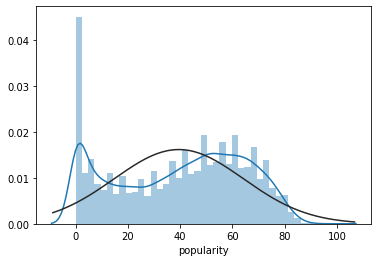

<Figure size 432x288 with 0 Axes>

In [4]:
#histogram 
sns.distplot(tds1['popularity'], fit=norm);
fig = plt.figure()
#res = stats.probplot(tds1['popularity'], plot=plt)

popularity          1.000000
followers           0.364913
instrumentalness   -0.287497
danceability        0.183657
loudness            0.156119
liveness           -0.091539
time_signature      0.086742
acousticness       -0.079486
valence             0.079228
duration_ms        -0.052718
energy              0.038633
speechiness        -0.037488
tempo              -0.017572
key                -0.006985
mode               -0.000819
Name: popularity, dtype: float64

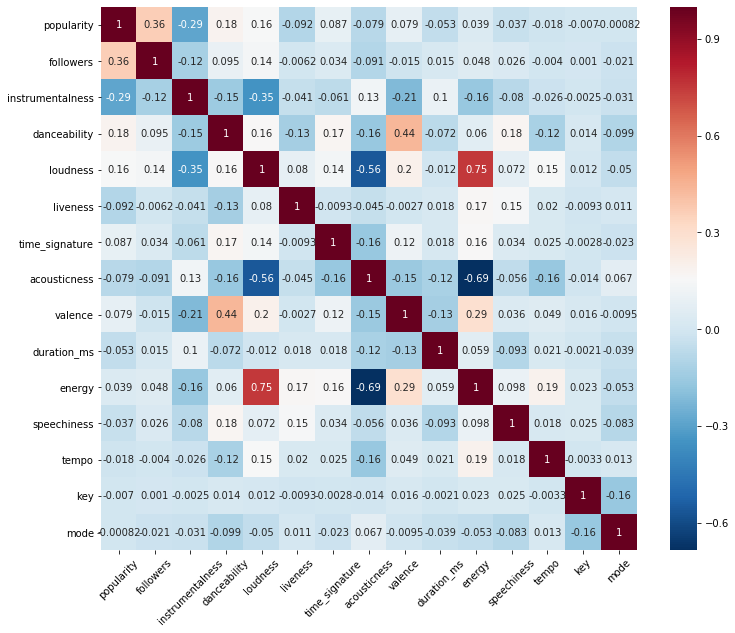

In [5]:
# Key Features & Correlation Matrix 
exp.plot_correlations(tds1, 'popularity', limit=17, annot=True)

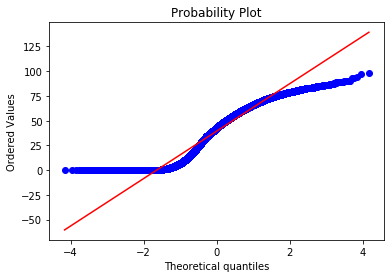

In [6]:
#normal probability plot
fig = plt.figure()
res = stats.probplot(tds1['popularity'], plot=plt)

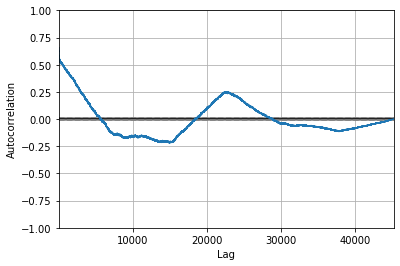

In [7]:
# create an autocorrelation plot
from pandas.plotting import autocorrelation_plot
series = tds1['popularity']
autocorrelation_plot(series)
#pyplot.show()

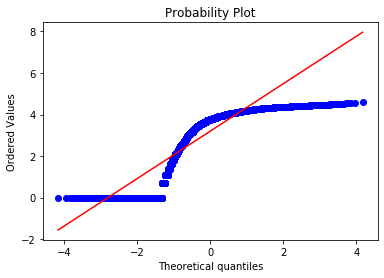

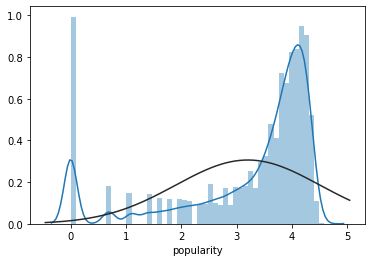

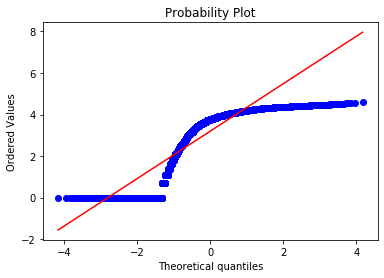

In [8]:
#applying log transformation by replacing zeros with ones
tds2 = tds1
#tds2 = tds2.loc[dataframe3['popularity'] != 0]
tds2.loc[tds2['popularity'] == 0, 'popularity'] = 1
#tds2['popularity'].value_counts(0)
#transformed histogram and normal probability plot
y_lg = np.log(tds2['popularity'])
sns.distplot(y_lg, fit=norm);
fig = plt.figure()
res = stats.probplot(y_lg, plot=plt)
fig

# Linear Regression

## Define Datasets 

In [9]:
#Combined Dataset
dfcombine = tds1
#dfcombine = dfcombine.reset_index(inplace=True, drop=True)

#Target Dataset
dfy = pd.DataFrame(tds1["popularity"])

#all the independant variables/predictors are named as dfx
dfx = dfcombine.drop(columns=['Artist', 'Track','popularity'])
dfx.head()

,followers,instrumentalness,acousticness,danceability,duration_ms,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1627956,0.014100,0.05910,0.646,307413,0.840,8,0.0516,-8.213,1,0.0283,125.187,4,0.716
1,10469,0.000035,0.00119,0.496,191160,0.928,1,0.0988,-2.367,0,0.0469,144.932,4,0.561
2,5505368,0.000000,0.09090,0.586,213720,0.692,8,0.0567,-5.143,1,0.1770,158.041,4,0.457
3,880039,0.002050,0.00361,0.643,210667,0.896,0,0.9010,-6.662,1,0.0359,130.011,4,0.338
4,13,0.776000,0.00328,0.699,119053,0.974,9,0.2900,-5.576,0,0.1500,125.934,4,0.443


In [10]:
dfy.head()

,popularity
0,38
1,11
2,31
3,1
4,2


In [11]:
#trying to get rid of >ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
np.where(dfx.values >= np.finfo(np.float64).max)
np.isnan(dfx.values.any())
dfx.replace([np.inf, -np.inf], np.nan, inplace=True)

In [12]:
#trying to get rid of >ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
np.where(dfy.values >= np.finfo(np.float64).max)
np.isnan(dfy.values.any())
dfy.replace([np.inf, -np.inf], np.nan, inplace=True)

## Train Set  - Linear Regression 

In [13]:
dfx.reset_index(inplace=True, drop=True)
dfy.reset_index(inplace=True, drop=True)
dfy.shape

(45157, 1)

In [14]:
#to perform the train test split of the data, the train test split function is imported from sklearn
from sklearn.model_selection import train_test_split
#the percentage of the split is taken as 30%. SO the percentage of training is 70%
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=42)

In [15]:
# linear regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#the target is predicted for the test dataset
predictions = model.predict(X_test)
#the accuracy of the prediction is found to be.... 
model.score(X_test,y_test)

0.2218272043217525

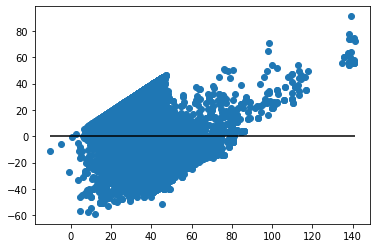

In [17]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
# Plot Residuals
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

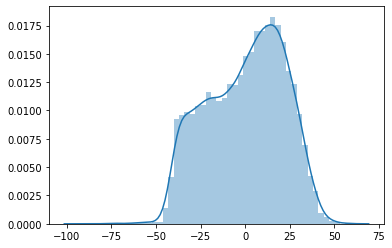

In [18]:
error = y_test - predictions
#the error is calculated for the above test predictions and a distribution plot is plotted.
sns.distplot(error)

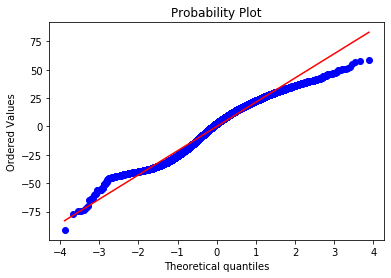

In [19]:
fig = plt.figure()
res = stats.probplot(error['popularity'], plot=plt)

## Regression With Scaler 

In [20]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [21]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#the target is predicted for the test dataset
predictions = model.predict(X_test_scaled)
#the accuracy of the prediction is found to be.... 
model.score(X_test_scaled,y_test)

0.22182720432194314

## OLS Regression  

In [24]:
oness = np.ones((len(dfx),1),dtype = int)
dfone = pd.DataFrame(oness, columns = ['ones'])
dfxnew = dfone.join(dfx)
dfxnew.head()


,ones,followers,instrumentalness,acousticness,danceability,duration_ms,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1,1627956,0.014100,0.05910,0.646,307413,0.840,8,0.0516,-8.213,1,0.0283,125.187,4,0.716
1,1,10469,0.000035,0.00119,0.496,191160,0.928,1,0.0988,-2.367,0,0.0469,144.932,4,0.561
2,1,5505368,0.000000,0.09090,0.586,213720,0.692,8,0.0567,-5.143,1,0.1770,158.041,4,0.457
3,1,880039,0.002050,0.00361,0.643,210667,0.896,0,0.9010,-6.662,1,0.0359,130.011,4,0.338
4,1,13,0.776000,0.00328,0.699,119053,0.974,9,0.2900,-5.576,0,0.1500,125.934,4,0.443


In [25]:
dfxnew.reset_index(inplace=True, drop=True)
dfy.reset_index(inplace=True, drop=True)
print(dfy.shape)
print(dfxnew.shape)

(45157, 1)
(45157, 15)


In [26]:
import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as lm

In [27]:
#OLS Regression - ,
lir_ols = lm.OLS(endog = dfy, exog = dfxnew).fit()
lir_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     929.2
Date:                Mon, 27 Apr 2020   Prob (F-statistic):               0.00
Time:                        00:38:50   Log-Likelihood:            -2.0300e+05
No. Observations:               45157   AIC:                         4.060e+05
Df Residuals:                   45142   BIC:                         4.062e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ones                31.1328      1.544     20.163      0.000      28.106      34.159
followers         1.514e-06      2e-08     75.721      0.000    1.47e-06    1.55e-06
instrumentalness   -20.1146      0.415    -48.505      0.000     -20.927     -19.302
acousticness        -1.2289      0.476     -2.584      0.010      -2.161      -0.297
danceability        16.4253      0.738     22.246      0.000      14.978      17.873
duration_ms      -9.952e-06   1.27e-06     -7.856      0.000   -1.24e-05   -7.47e-06
energy              -5.0722      0.858     -5.910      0.000      -6.754      -3.390
key                 -0.0477      0.029     -1.653      0.098      -0.104       0.009
liveness           -10.3203      0.650    -15.880      0.000     -11.594      -9.047
loudness             0.2953      0.040      7.347      0.000       0.216       0.374
mode                 0.2173      0.219      0.992      0.321      -0.212       0.646
speechiness        -18.4529      1.041    -17.734      0.000     -20.492     -16.413
tempo               -0.0056      0.004     -1.547      0.122      -0.013       0.002
time_signature       3.0441      0.289     10.545      0.000       2.478       3.610
valence             -1.8562      0.493     -3.763      0.000      -2.823      -0.889
==============================================================================
Omnibus:                     6658.753   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1923.328
Skew:                          -0.228   Prob(JB):                         0.00
Kurtosis:                       2.098   Cond. No.                     9.03e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## RMSE Model with Plot

In [28]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

RMSE on Training set : 21.715741914282336
RMSE on Test set : 21.637987126138604


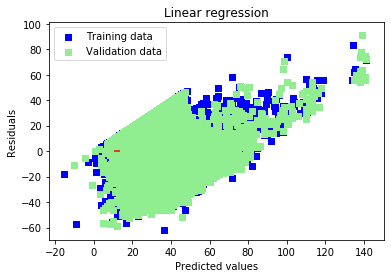

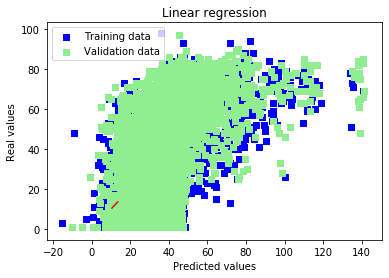

In [29]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Classification Models 

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

##  Dataframe & Feature Set-up 

In [31]:
dataframe = tds1
dataframe.shape


(45157, 17)

Text(0.5, 1.0, 'Popularity Distribution')

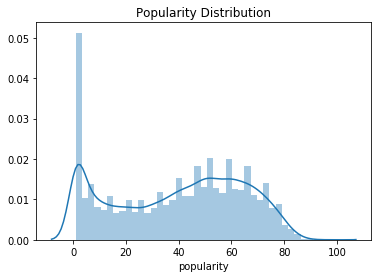

In [32]:
sns.distplot(dataframe['popularity']).set_title('Popularity Distribution')

In [33]:
#dataframe.loc[dataframe['popularity'] == 0]
dataframe.describe()

,followers,instrumentalness,popularity,acousticness,danceability,duration_ms,energy,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,4.515700e+04,45157.000000,45157.000000,45157.000000,45157.000000,4.515700e+04,45157.000000,45157.000000,45157.000000,45157.000000,45157.000000,45157.000000,45157.000000,45157.000000,45157.000000
mean,1.890777e+06,0.124477,39.538610,0.278239,0.593009,2.310003e+05,0.631839,5.276015,0.190949,-8.223496,0.648094,0.090158,120.917113,3.930841,0.516775
std,5.217369e+06,0.274807,24.608246,0.307571,0.171259,8.312010e+04,0.232142,3.581349,0.163793,4.300239,0.477570,0.102903,29.012747,0.363697,0.255033
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,5.627000e+03,0.000020,0.000000,0.000000,-54.909000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.646100e+04,0.000000,17.000000,0.019000,0.482000,1.870670e+05,0.475000,2.000000,0.093100,-10.197000,0.000000,0.035400,98.257000,4.000000,0.313000
50%,1.751950e+05,0.000060,43.000000,0.141000,0.606000,2.191200e+05,0.662000,5.000000,0.124000,-7.256000,1.000000,0.049200,120.014000,4.000000,0.515000
75%,1.075210e+06,0.021200,60.000000,0.490000,0.720000,2.594130e+05,0.822000,8.000000,0.240000,-5.261000,1.000000,0.093700,138.841000,4.000000,0.725000
max,6.237875e+07,0.999000,98.000000,0.996000,0.988000,2.752254e+06,1.000000,11.000000,0.998000,4.405000,1.000000,0.963000,245.941000,5.000000,0.998000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


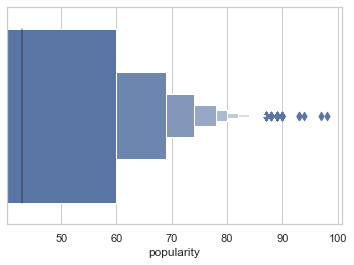

In [34]:


sns.set(style="whitegrid")

tips = sns.load_dataset("tips")

ax = sns.boxenplot(x=dataframe['popularity'])

In [35]:
#Convert popularity to binary varible. 
#we will define above 20 as "popular" since that's the border of the top 25% of songs and encode that as 1,
#and below 75 as "not popular" and encode that as 0.

dataframe.loc[dataframe['popularity'] < 60, 'popularity'] = 0 
dataframe.loc[dataframe['popularity'] >= 60, 'popularity'] = 1
#dataframe.loc[dataframe['popularity'] == 0]


In [36]:
dataframe['popularity'].value_counts()

0    33443
1    11714
Name: popularity, dtype: int64

In [37]:
features = ["danceability", "energy", "followers", "key", "liveness" ,'instrumentalness', 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

In [38]:
#Next we define 80% of the dataframe for training and 20% of the dataframe for testing.
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features]

In [39]:
#We add a validation dataset using train_test_split.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

## Logistic Regresssion 

In [40]:
#Logistic Regression
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_valid, LR_Predict) 
print("AUC: " + str(LR_AUC))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7890949349570994
AUC: 0.6235751545208452


## RandomForestClassifier

In [41]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.9112925546637144
AUC: 0.8728557781431244


## K-Nearest Neighbors Classifier

In [42]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict) 
print("AUC: " + str(KNN_AUC))

Accuracy: 0.8295045668419596
AUC: 0.771022999233199


## Decision Tree Classifier

In [43]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.8838915029061721
AUC: 0.8671669017229814


## Model Performance Summary

In [44]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      ],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy]})

model_performance_AUC = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier'],
                                            'AUC': [LR_AUC,
                                                         RFC_AUC,
                                                         KNN_AUC,
                                                         DT_AUC]})

In [45]:
model_performance_accuracy


,Model,Accuracy
0,LogisticRegression,0.789095
1,RandomForestClassifier,0.911293
2,KNeighborsClassifier,0.829505
3,DecisionTreeClassifier,0.883892


In [46]:
model_performance_AUC

,Model,AUC
0,LogisticRegression,0.623575
1,RandomForestClassifier,0.872856
2,KNeighborsClassifier,0.771023
3,DecisionTreeClassifier,0.867167


# Revisiting Linear Regression Assumptions

## LR model dropping 0 & 1 Popularity 

In [47]:
file = "features_45k.csv"
tds = pd.read_csv(file)
tds = tds[['Artist', 'Track', 'followers','popularity','acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence']]
tds.head()

,Artist,Track,followers,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Lionel Richie,Tonight Will Be Alright,1627956,38,0.05910,0.646,307413,0.840,0.014100,8,0.0516,-8.213,1,0.0283,125.187,4,0.716
1,Course Of Nature,The Window,10469,11,0.00119,0.496,191160,0.928,0.000035,1,0.0988,-2.367,0,0.0469,144.932,4,0.561
2,Mariah Carey,Inseparable,5505368,31,0.09090,0.586,213720,0.692,0.000000,8,0.0567,-5.143,1,0.1770,158.041,4,0.457
3,Extra Virgin,One Night,880039,0,0.00361,0.643,210667,0.896,0.002050,0,0.9010,-6.662,1,0.0359,130.011,4,0.338
4,Joe and Will Ask?,Claymore,13,2,0.00328,0.699,119053,0.974,0.776000,9,0.2900,-5.576,0,0.1500,125.934,4,0.443


In [48]:
#dataframe2 = tds
#dataframe.loc[dataframe['popularity'] < 53, 'popularity'] = 0 
#dataframe.loc[dataframe['popularity'] >= 53, 'popularity'] = 1
#dataframe2.loc[dataframe2['popularity'] == 5]

In [49]:
#print(dataframe2.shape)
#dataframe2.head()

In [50]:
dataframe3= tds
print(dataframe3.shape)


(45157, 17)


In [51]:
#remove popularity values 0 to (15) to improve distribution shape
dataframe3 = dataframe3.loc[dataframe3['popularity'] != 0]
dataframe3 = dataframe3.loc[dataframe3['popularity'] != 1]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 2]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 3]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 4]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 5]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 6]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 7]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 8]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 9]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 10]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 11]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 12]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 13]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 14]
#dataframe3 = dataframe3.loc[dataframe3['popularity'] != 15]

In [52]:
dataframe3.shape

(41043, 17)

Text(0.5, 1.0, 'Popularity Distribution')

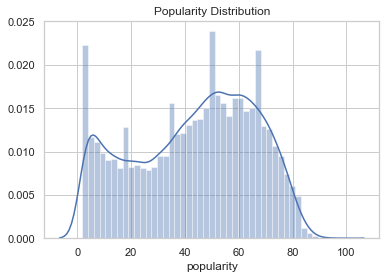

In [53]:
sns.distplot(dataframe3['popularity']).set_title('Popularity Distribution')

In [54]:
dataframe3.describe()

,followers,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,4.104300e+04,41043.000000,41043.000000,41043.000000,4.104300e+04,41043.000000,41043.000000,41043.000000,41043.000000,41043.000000,41043.000000,41043.000000,41043.000000,41043.000000,41043.000000
mean,2.069510e+06,43.401579,0.273918,0.598384,2.297365e+05,0.635192,0.107461,5.275808,0.189601,-8.059675,0.645689,0.090129,120.979321,3.938041,0.520558
std,5.439702e+06,22.415775,0.302257,0.168169,7.748861e+04,0.228514,0.256923,3.580630,0.161731,4.164529,0.478310,0.100800,28.865599,0.342392,0.252682
min,0.000000e+00,2.000000,0.000000,0.000000,3.034700e+04,0.000020,0.000000,0.000000,0.009990,-40.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.821400e+04,25.000000,0.020600,0.489000,1.880485e+05,0.481000,0.000000,2.000000,0.093200,-9.977000,0.000000,0.035400,98.340000,4.000000,0.319000
50%,2.374410e+05,47.000000,0.140000,0.611000,2.188400e+05,0.664000,0.000040,5.000000,0.124000,-7.118000,1.000000,0.049300,120.003000,4.000000,0.519000
75%,1.345191e+06,62.000000,0.477000,0.723000,2.577600e+05,0.822000,0.011000,8.000000,0.238000,-5.186000,1.000000,0.095000,139.000000,4.000000,0.727000
max,6.237875e+07,98.000000,0.996000,0.988000,2.752254e+06,1.000000,0.999000,11.000000,0.998000,4.405000,1.000000,0.961000,242.318000,5.000000,0.998000


In [55]:
#Combined Dataset
dfcombine = dataframe3
#dfcombine = dfcombine.reset_index(inplace=True, drop=True)
#Target Dataset
dfy = pd.DataFrame(dataframe3["popularity"])
#all the independant variables/predictors are named as dfx
dfx = dfcombine.drop(columns=['Artist', 'Track','popularity'])
dfx.shape

(41043, 14)

In [56]:
dfy.head()

,popularity
0,38
1,11
2,31
4,2
5,6


In [57]:
dfx.reset_index(inplace=True, drop=True)
dfy.reset_index(inplace=True, drop=True)


In [58]:
#to perform the train test split of the data, the train test split function is imported from sklearn
from sklearn.model_selection import train_test_split
#the percentage of the split is taken as 30%. SO the percentage of training is 70%
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.3, random_state=42)

In [59]:
# linear regression 
from sklearn.linear_model import LinearRegression
linR = LinearRegression()
linR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
#the target is predicted for the test dataset
predictions = linR.predict(X_test)
#the accuracy of the prediction is found to be.... 
linR.score(X_test,y_test)

0.20701449238740566

## Applying Log Transformation  

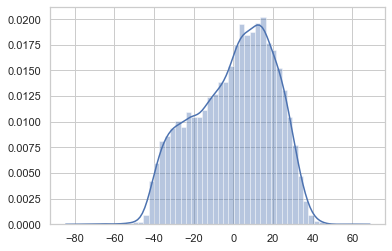

In [61]:
error = y_test - predictions
#the error is calculated for the above test predictions and a distribution plot is plotted.
sns.distplot(error)

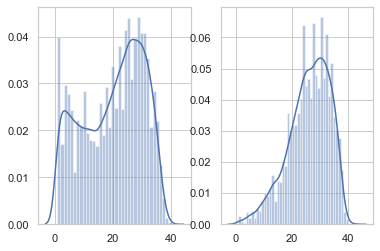

In [62]:
#BoxCox Transformation 



# generate non-normal data
original_data = dfy['popularity']

# split into testing & training data
train,test = train_test_split(original_data, shuffle=False)

# transform training data & save lambda value
train_data,fitted_lambda = stats.boxcox(train)

# use lambda value to transform test data
test_data = stats.boxcox(test, fitted_lambda)

# (optional) plot train & test
fig, ax=plt.subplots(1,2)
sns.distplot(train_data, ax=ax[0])
sns.distplot(test_data, ax=ax[1])

Text(0.5, 0, 'Popularity')

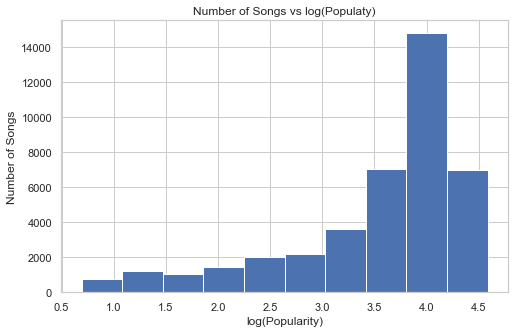

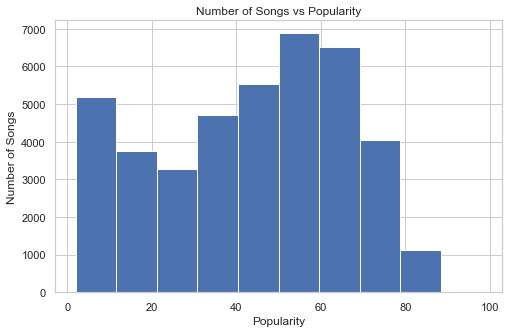

In [63]:
dfy['log_popularity'] = np.log(dfy['popularity'])

dfy.hist('log_popularity',figsize=(8,5))
plt.title('Number of Songs vs log(Populaty)')
plt.ylabel('Number of Songs')
plt.xlabel("log(Popularity)")


dfy.hist('popularity',figsize=(8,5))
plt.title('Number of Songs vs Popularity')
plt.ylabel('Number of Songs')
plt.xlabel("Popularity")


In [64]:
dfy_l = pd.DataFrame(dfy['log_popularity'])
dfy_l.shape

(41043, 1)

In [65]:
dfx.shape

(41043, 14)

In [66]:
X_train, X_test, y_train_l, y_test_l = train_test_split(dfx, dfy_l, test_size=0.3, random_state=42)
linR2 = LinearRegression()
linR2.fit(X_train, y_train_l)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
predictions2 = linR2.predict(X_test)
#the accuracy of the prediction is found to be.... 
linR2.score(X_test,y_test_l)


0.14535473882084615

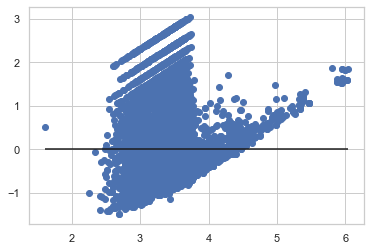

In [68]:
from sklearn.metrics import accuracy_score
predictions2 = linR2.predict(X_test)
# Plot Residuals
plt.scatter(predictions2, predictions2 - y_test_l)
plt.hlines(y=0, xmin=predictions2.min(), xmax=predictions2.max())
plt.show()

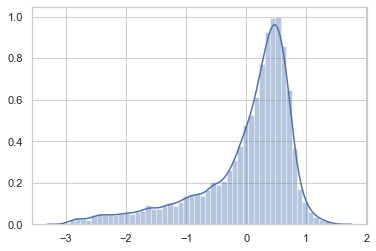

In [69]:
error2 = y_test_l - predictions2
#the error is calculated for the above test predictions and a distribution plot is plotted.
sns.distplot(error2)


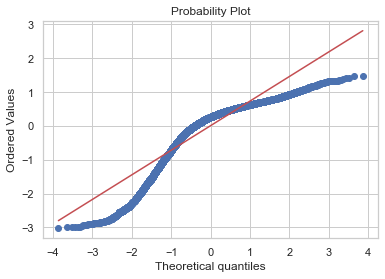

In [70]:
fig = plt.figure()
res = stats.probplot(error2['log_popularity'], plot=plt)

## Using Fewer Variables

In [71]:
dfx2 = dfx.drop(['tempo','speechiness','key','mode', 'duration_ms'], axis = 1)
dfx2.head()

,followers,acousticness,danceability,energy,instrumentalness,liveness,loudness,time_signature,valence
0,1627956,0.05910,0.646,0.840,0.014100,0.0516,-8.213,4,0.716
1,10469,0.00119,0.496,0.928,0.000035,0.0988,-2.367,4,0.561
2,5505368,0.09090,0.586,0.692,0.000000,0.0567,-5.143,4,0.457
3,13,0.00328,0.699,0.974,0.776000,0.2900,-5.576,4,0.443
4,238795,0.00407,0.338,0.938,0.000000,0.3230,-4.001,4,0.311


In [72]:
dfy.shape

(41043, 2)

In [73]:
#dfx2 = dfx2.loc[dfx2['popularity'] != 0]
#dfx2 = dfx2.loc[dfx2['popularity'] != 1]
dfx2.shape

(41043, 9)

In [74]:
#the percentage of the split is taken as 30%. SO the percentage of training is 70%
X_train2, X_test2, y_train2, y_test2 = train_test_split(dfx2, dfy, test_size=0.3, random_state=42)
linR2 = LinearRegression()
linR2.fit(X_train2, y_train2)
#the target is predicted for the test dataset
predictions = linR2.predict(X_test2)
#the accuracy of the prediction is found to be.... 
linR2.score(X_test2,y_test2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.19939539913564744

## The EnD (for now) 

